# **Exploratory Data Analysis (EDA)**

## **Importing the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## **Loading the dataset**

In [3]:
data = pd.read_csv('data/sensor.csv')

In [4]:
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


### **Observation**
- the 'Unnamed: 0' is an unnecessary column, so better we remove it
---

In [5]:
data = pd.read_csv('data/sensor.csv',index_col=0)

In [6]:
data.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## **Shape**

In [7]:
data.shape

(220320, 54)

## **Info of the dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16      

### **Observation**
- except two, all other columns are of float data type
---

## **Checking for null values**

In [9]:
data.isnull().sum()

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


### **Observation**
- except two, all other columns have null values
---

## **Percentage of null values**

In [10]:
null_percentage = (data.isnull().mean() * 100).round(2)   # Calculates and rounds to 2 decimal places
null_percentage = null_percentage.astype(str) + ' %'
print(null_percentage)

timestamp           0.0 %
sensor_00          4.63 %
sensor_01          0.17 %
sensor_02          0.01 %
sensor_03          0.01 %
sensor_04          0.01 %
sensor_05          0.01 %
sensor_06          2.18 %
sensor_07          2.47 %
sensor_08          2.32 %
sensor_09          2.09 %
sensor_10          0.01 %
sensor_11          0.01 %
sensor_12          0.01 %
sensor_13          0.01 %
sensor_14          0.01 %
sensor_15         100.0 %
sensor_16          0.01 %
sensor_17          0.02 %
sensor_18          0.02 %
sensor_19          0.01 %
sensor_20          0.01 %
sensor_21          0.01 %
sensor_22          0.02 %
sensor_23          0.01 %
sensor_24          0.01 %
sensor_25          0.02 %
sensor_26          0.01 %
sensor_27          0.01 %
sensor_28          0.01 %
sensor_29          0.03 %
sensor_30          0.12 %
sensor_31          0.01 %
sensor_32          0.03 %
sensor_33          0.01 %
sensor_34          0.01 %
sensor_35          0.01 %
sensor_36          0.01 %
sensor_37   

### **Observation**
- The **sensor_15** feature have **100%** null values
- **sensor_50** have **35%** null values
- Few features have the null percentage in range **2 - 7%** , then the reamaining are under **0.03%**
---

In [11]:
#As the feature sensor_15 have 100% null values it better we drop that, as it won't provide any usefull information
data.drop(columns=['sensor_15'], inplace=True)

In [12]:
data.columns

Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

### **Observation**
- **sensor_15** feature have been dropped
---

## **Type casting the timestamp feature**

In [13]:
#Typecasting
data['timestamp'] = pd.to_datetime(data['timestamp'])

#Seting the timestamp as index for the dataframe
data.set_index('timestamp', inplace=True)

#Sorting the dataframne on the timestamp
data.sort_index(inplace=True)

In [14]:
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## **Missing values imputation**

In [15]:
missing_cols = data.columns[data.isnull().any()].to_list()
print("Columns with missing values:", missing_cols)

Columns with missing values: ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51']


### **Box plot**

In [16]:
def plot_boxplots_grid(df, columns, n_cols=3, figsize=(18, 4), title="Box Plots of Features with Missing Values", color='skyblue'):
    """
    Plots boxplots for the specified columns in a grid layout.

    Parameters:
    -----------
    df : pd.DataFrame
        The dataframe containing the data.
    columns : list
        List of column names to plot.
    n_cols : int
        Number of columns per row in the subplot grid.
    figsize : tuple
        Size of the entire figure (width, height multiplier).
    title : str
        Main title of the plot.
    color : str
        Color for the boxplots.

    Returns:
    --------
    None (displays the plot)
    """
    if not columns:
        print("No columns provided for plotting.")
        return

    n_rows = math.ceil(len(columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    plt.subplots_adjust(hspace=0.5, wspace=0.4)

    # Flatten axes for easy indexing
    axes = axes.flatten() if len(columns) > 1 else [axes]

    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i], color=color, linewidth=1)
        axes[i].set_title(col, fontsize=10, fontweight='bold')
        axes[i].grid(True, linestyle='--', alpha=0.5)
        axes[i].set_xlabel("")  # cleaner look

    # Hide any unused axes
    for j in range(len(columns), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


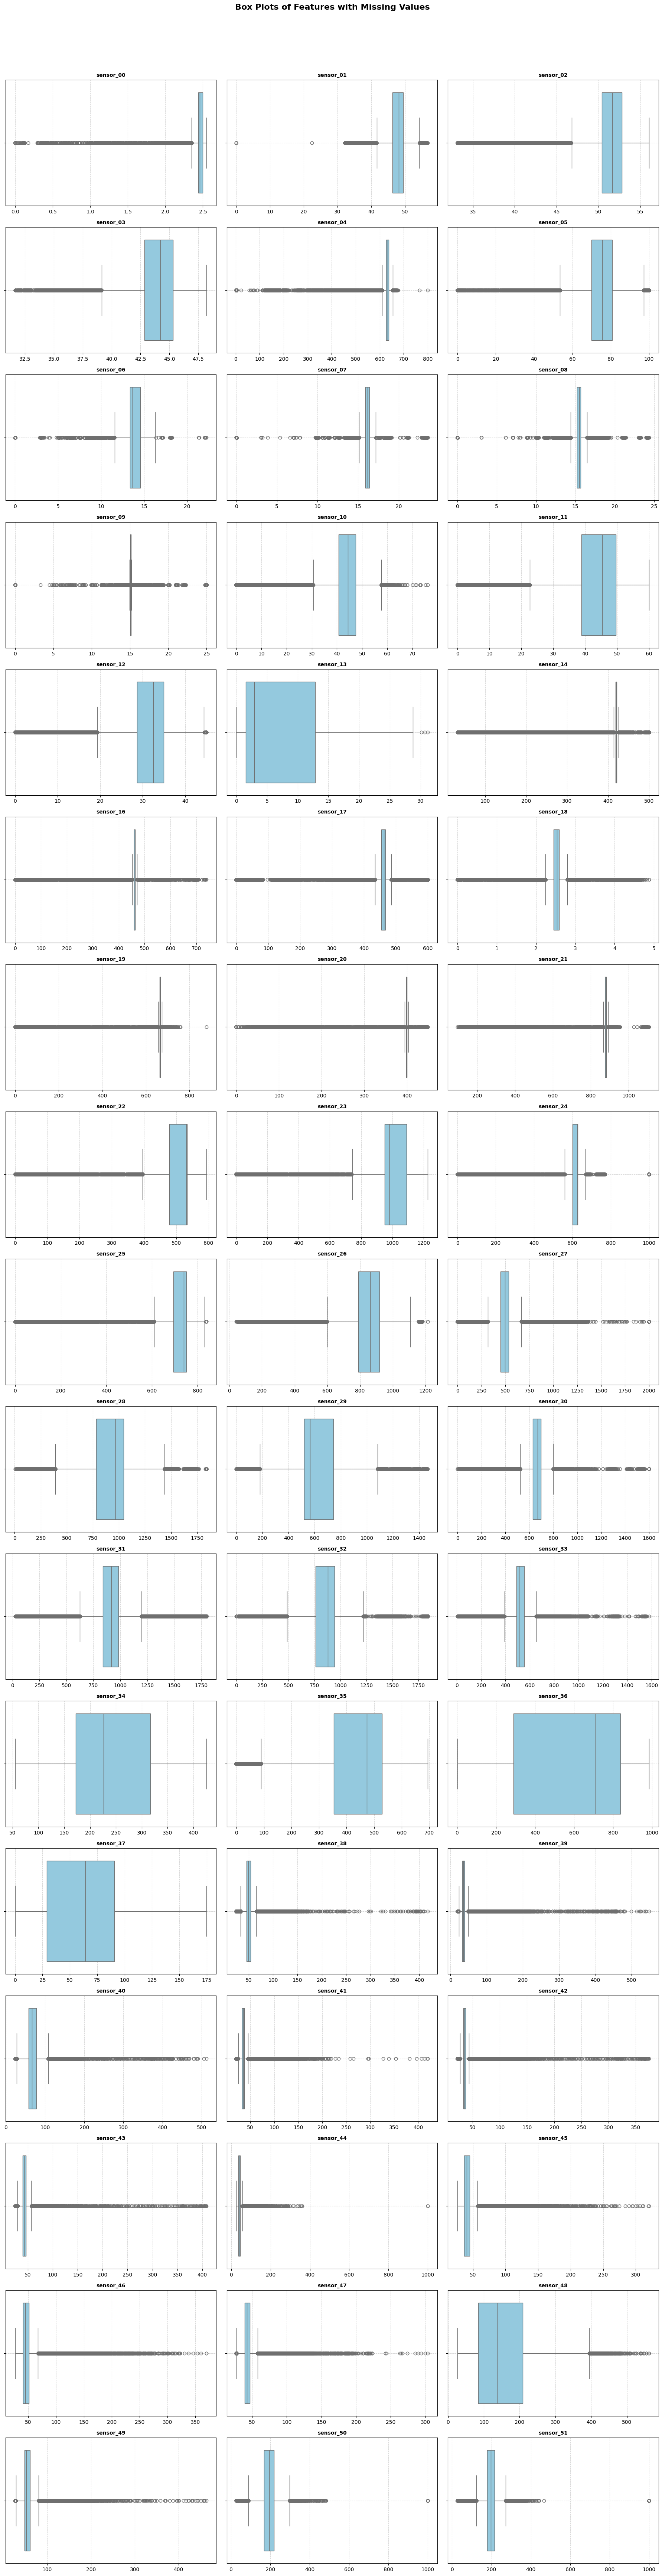

In [17]:
plot_boxplots_grid(df= data, columns= missing_cols)

### **Observation**
- Almost every feature have outliers
- So, using **mean** for imputation of null values is not feasible
- So we will use **median**

In [18]:
#Imputation
for col in missing_cols:
    median_val = data[col].median()
    data[col].fillna(
        value= median_val,
        inplace= True
    )

In [19]:
data[missing_cols].isnull().sum()

sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_50    0
sensor_51    0
dtype: int64

### **Observation**

- Successfully imputed the null values
---

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

selected_sensors = missing_cols
n_cols = 3  # Number of columns in the grid
n_rows = (len(selected_sensors) // n_cols) + (1 if len(selected_sensors) % n_cols != 0 else 0)

# Create subplots with shared x-axis (timestamps)
fig = make_subplots(rows=n_rows, cols=n_cols, shared_xaxes=True,
                    vertical_spacing=0.03, subplot_titles=selected_sensors)

# Add each sensor data as a subplot
for i, sensor in enumerate(selected_sensors):
    row = i // n_cols + 1  # Row number in the grid
    col = i % n_cols + 1   # Column number in the grid
    fig.add_trace(go.Scatter(x=data.index, y=data[sensor], mode='lines', name=sensor),
                  row=row, col=col)

# Update layout
fig.update_layout(
    height=300 * n_rows,  # Adjust height based on number of rows
    title_text="Time Series of All 51 Sensors",
    showlegend=False,
    template='plotly_white'
)

fig.update_xaxes(title_text="Timestamp", showgrid=True)
fig.update_yaxes(title_text="Reading", ticks="outside")

fig.show()